In [1]:
# Import the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Model Evalualtion Libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import confusion_matrix

In [2]:
df=pd.read_csv("train.csv")

In [3]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


<AxesSubplot:>

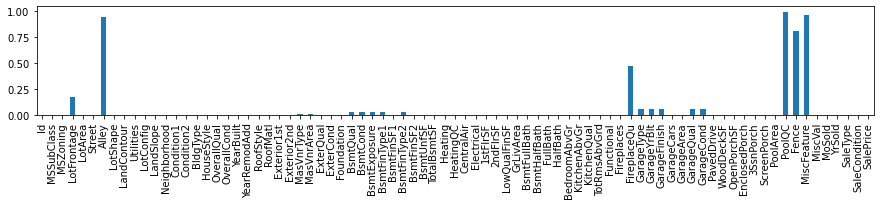

In [4]:
(df.isnull().sum()/len(df)).plot(kind="bar",figsize=(15,2))

In [5]:
dropCol=[]
for label, content in df.items():
     if df[label].isnull().sum()*100.0/len(df) > 50:
            dropCol.append(label)

In [6]:
dropCol

['Alley', 'PoolQC', 'Fence', 'MiscFeature']

In [7]:
for label in dropCol:
    df.drop(label,axis=1,inplace=True)

In [8]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


<AxesSubplot:>

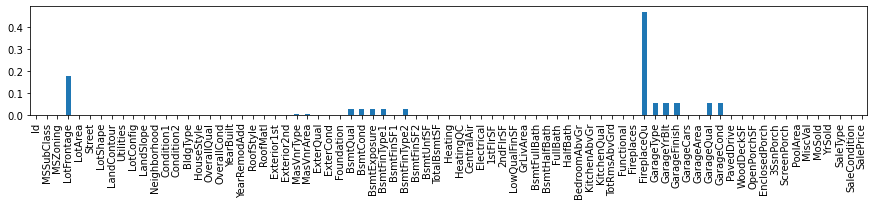

In [9]:
(df.isnull().sum()/len(df)).plot(kind="bar",figsize=(15,2))

In [10]:
import math

In [11]:
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isna(content).sum():
            import math
            content.fillna(math.floor(df[label].mean()),inplace=True)

<AxesSubplot:>

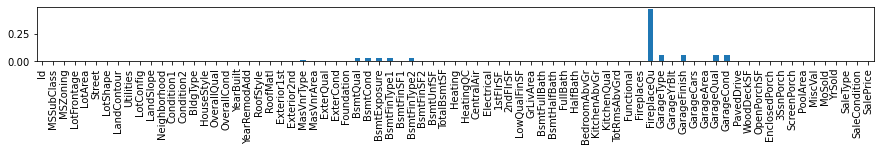

In [12]:
(df.isnull().sum()/len(df)).plot(kind="bar",figsize=(15,1))

In [13]:
df = df.apply(lambda x: x.fillna(x.value_counts().index[0]))

<AxesSubplot:>

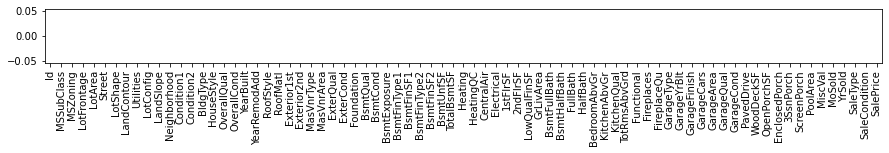

In [14]:
(df.isnull().sum()/len(df)).plot(kind="bar",figsize=(15,1))

In [15]:
for label, cnt in df.items():
    if pd.api.types.is_string_dtype(cnt):
        df[label]=cnt.astype("category").cat.as_ordered()

In [16]:
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
            dummy=pd.get_dummies(df[label])
            df=pd.concat([df,dummy],axis='columns')

In [17]:
df=df._get_numeric_data()

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 277 entries, Id to Partial
dtypes: float64(3), int64(35), uint8(239)
memory usage: 774.3 KB


In [19]:
Y=df.SalePrice
X=df.drop("SalePrice",axis=1)
np.random.seed(42)
X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size=0.2)

In [20]:
from sklearn import svm
regr = svm.SVR(kernel='linear')
regr.fit(X_train, Y_train)
regr.score(X_test,Y_test)


0.7902291526426823

In [21]:
importance = regr.coef_[0]

In [22]:
len(Y_test)
Xc=range(1,len(Y_test)+1)
Y_preds=regr.predict(X_test)

In [23]:
len(Xc)

292

<function matplotlib.pyplot.legend(*args, **kwargs)>

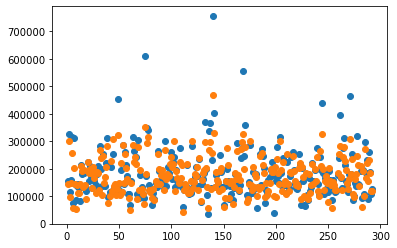

In [24]:
plt.scatter(Xc,Y_test)
plt.scatter(Xc,Y_preds)
plt.legend

In [25]:
X_test

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,ConLw,New,Oth,WD,Abnorml,AdjLand,Alloca,Family,Normal,Partial
892,893,20,70.0,8414,6,8,1963,2003,0.0,663,...,0,0,0,1,0,0,0,0,1,0
1105,1106,60,98.0,12256,8,5,1994,1995,362.0,1032,...,0,0,0,1,0,0,0,0,1,0
413,414,30,56.0,8960,5,6,1927,1950,0.0,0,...,0,0,0,1,0,0,0,0,1,0
522,523,50,50.0,5000,6,7,1947,1950,0.0,399,...,0,0,0,1,0,0,0,0,1,0
1036,1037,20,89.0,12898,9,5,2007,2008,70.0,1022,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,480,30,50.0,5925,4,7,1937,2000,435.0,168,...,0,0,0,1,0,0,1,0,0,0
1361,1362,20,124.0,16158,7,5,2005,2005,16.0,1274,...,0,0,0,1,0,0,0,0,1,0
802,803,60,63.0,8199,7,5,2005,2005,0.0,648,...,0,0,0,1,0,0,0,0,1,0
651,652,70,60.0,9084,4,5,1940,1950,0.0,0,...,0,0,0,1,0,0,0,0,1,0


In [33]:
%%time
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_jobs=-1)
model.fit(X_train,Y_train)

Wall time: 526 ms


RandomForestRegressor(n_jobs=-1)

In [34]:
model.score(X_test,Y_test)

0.8875344188187556

In [35]:
model.score(X_test,Y_test)

0.8875344188187556

In [36]:
model.score(df.drop("SalePrice",axis=1),df.SalePrice)

0.9582897146012532

In [37]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def rmsle(Y_test,Y_preds):
    return np.sqrt(mean_squared_log_error(Y_test,Y_preds))

def show_scores(model):
    train_preds=model.predict(X_train)
    test_preds=model.predict(X_test)
    scores={
        "Train MAE": mean_absolute_error(Y_train,train_preds),
        "Test MAE": mean_absolute_error(Y_test,test_preds),
        "Training RMSLE": rmsle(Y_train,train_preds),
        "Test RMSLE": rmsle(Y_test,test_preds),
        "Train R-square": r2_score(Y_train,train_preds),
        "Test R-square":r2_score(Y_test,test_preds),
        "Train RSME": math.sqrt(mean_squared_error(Y_train,train_preds)),
        "Test RSME":math.sqrt(mean_squared_error(Y_test,test_preds)) }
    return scores

In [38]:
show_scores(model)

{'Train MAE': 6461.529991438357,
 'Test MAE': 17982.712739726026,
 'Training RMSLE': 0.0583206484587098,
 'Test RMSLE': 0.15604023261383332,
 'Train R-square': 0.981027821224524,
 'Test R-square': 0.8875344188187556,
 'Train RSME': 10637.693176640287,
 'Test RSME': 29370.864725796382}

In [54]:
rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"],
           "max_samples": [1000]}

rf_model = RandomizedSearchCV(RandomForestRegressor(),
                              param_distributions=rf_grid,
                              n_iter=500,
                              cv=5,
                              verbose=True)

In [55]:
import warnings
warnings.filterwarnings("ignore")

rf_model.fit(df.drop,Y_train)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=500,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [1000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [56]:
show_scores(rf_model)

{'Train MAE': 19222.270223543725,
 'Test MAE': 22341.653663879133,
 'Training RMSLE': 0.15822971436698297,
 'Test RMSLE': 0.19641744810958298,
 'Train R-square': 0.8178808322348838,
 'Test R-square': 0.7805337564453053,
 'Train RSME': 32958.44279174777,
 'Test RSME': 41028.98584574675}

In [34]:
df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,ConLw,New,Oth,WD,Abnorml,AdjLand,Alloca,Family,Normal,Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,0,0,1,0,0,0,0,1,0
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,0,0,0,1,0,0,0,0,1,0
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,0,0,1,0,0,0,0,1,0
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,0,0,0,1,0,0,0,0,1,0


In [35]:
df1=pd.read_csv('test.csv')

In [36]:
df1

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


<AxesSubplot:>

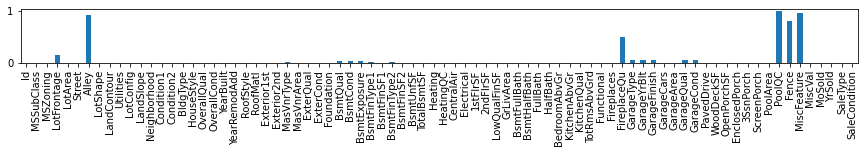

In [37]:
(df1.isnull().sum()/len(df1)).plot(kind="bar",figsize=(15,1))

In [38]:
for label in dropCol:
    df1.drop(label,axis=1,inplace=True)
    print([label])

['Alley']
['PoolQC']
['Fence']
['MiscFeature']


In [39]:
df1

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,...,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,...,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,...,82,0,0,144,0,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,...,24,0,0,0,0,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,...,32,0,0,0,0,700,7,2006,WD,Normal


<AxesSubplot:>

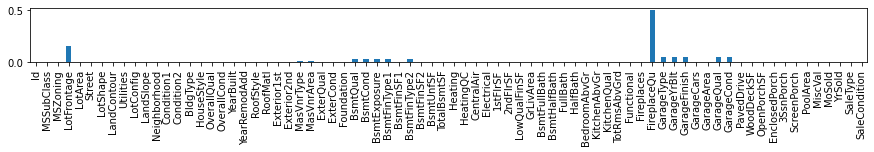

In [40]:
(df1.isnull().sum()/len(df1)).plot(kind="bar",figsize=(15,1))

In [41]:
for label, content in df1.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isna(content).sum():
            import math
            content.fillna(math.floor(df1[label].mean()),inplace=True)

In [42]:
df1 = df1.apply(lambda x: x.fillna(x.value_counts().index[0]))

<AxesSubplot:>

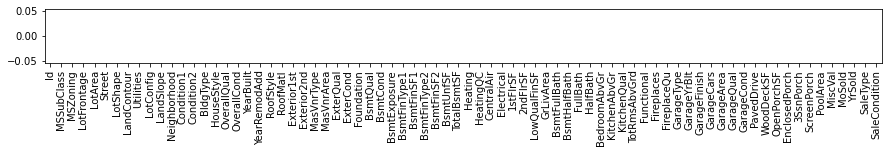

In [43]:
(df1.isnull().sum()/len(df1)).plot(kind="bar",figsize=(15,1))

In [44]:
for label, cnt in df.items():
    if pd.api.types.is_string_dtype(cnt):
        df1[label]=cnt.astype("category").cat.as_ordered()

In [45]:
df1

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,...,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,...,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,...,82,0,0,144,0,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,...,24,0,0,0,0,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,...,32,0,0,0,0,700,7,2006,WD,Normal


In [46]:
for label, content in df1.items():
    if not pd.api.types.is_numeric_dtype(content):
            dummy=pd.get_dummies(df1[label])
            df1=pd.concat([df1,dummy],axis='columns')

In [47]:
df1

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,ConLw,New,Oth,WD,Abnorml,AdjLand,Alloca,Family,Normal,Partial
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,1,0,0,0,0,1,0
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,1,0,0,0,0,1,0
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,1,0,0,0,0,1,0
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,1,0,0,0,0,1,0
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,1,0,0,0,0,1,0
1455,2916,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,1,1,0,0,0,0,0
1456,2917,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,1,1,0,0,0,0,0
1457,2918,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,1,0,0,0,0,1,0


In [103]:
df_train=df.copy()
df_test=df1._get_numeric_data()

In [104]:
temp_list = []

for i in columns:
    if i not in temp_list:
        temp_list.append(i)

In [105]:
train_column= df_train.columns
test_column=df_test.columns
len(train_column)


277

In [106]:
len(test_column)

260

In [107]:
add_colm=[]
for i in train_column:
    if i not in test_column:
        add_colm.append(i)

In [108]:
add_colm.remove('SalePrice')
print(add_colm)

['NoSeWa', '2.5Fin', 'ClyTile', 'Membran', 'Metal', 'Roll', 'Other', 'Floor', 'OthW', 'Mix']


In [109]:
for label in add_colm:
    df_train.drop(label,axis=1,inplace=True)
    print([label])

['NoSeWa']
['2.5Fin']
['ClyTile']
['Membran']
['Metal']
['Roll']
['Other']
['Floor']
['OthW']
['Mix']


In [110]:
df_train

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,ConLw,New,Oth,WD,Abnorml,AdjLand,Alloca,Family,Normal,Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,0,0,1,0,0,0,0,1,0
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,0,0,0,1,0,0,0,0,1,0
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,0,0,1,0,0,0,0,1,0
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,0,0,0,1,0,0,0,0,1,0


In [111]:
trainDf = df_train.loc[:,~df_train.columns.duplicated()]

In [112]:
trainDf

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,ConLw,New,Oth,WD,Abnorml,AdjLand,Alloca,Family,Normal,Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,0,0,1,0,0,0,0,1,0
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,0,0,0,1,0,0,0,0,1,0
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,0,0,1,0,0,0,0,1,0
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,0,0,0,1,0,0,0,0,1,0


In [113]:
testDf = df_test.loc[:,~df_test.columns.duplicated()]

In [114]:
testDf

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,ConLw,New,Oth,WD,Abnorml,AdjLand,Alloca,Family,Normal,Partial
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,0,0,0,1,0,0,0,0,1,0
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,0,0,0,1,0,0,0,0,1,0
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,0,0,0,1,0,0,0,0,1,0
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,0,0,0,1,0,0,0,0,1,0
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,21.0,1936,4,7,1970,1970,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1455,2916,160,21.0,1894,4,5,1970,1970,0.0,252.0,...,0,0,0,1,1,0,0,0,0,0
1456,2917,20,160.0,20000,5,7,1960,1996,0.0,1224.0,...,0,0,0,1,1,0,0,0,0,0
1457,2918,85,62.0,10441,5,5,1992,1992,0.0,337.0,...,0,0,0,1,0,0,0,0,1,0


In [161]:
%%time
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_jobs=-1,max_depth=100)
model.fit(trainDf.drop("SalePrice",axis=1),trainDf.SalePrice)

Wall time: 530 ms


RandomForestRegressor(max_depth=100, n_jobs=-1)

In [162]:
model.score(trainDf.drop("SalePrice",axis=1),trainDf.SalePrice)

0.9810640279977987

In [116]:
pred_price=model.predict(testDf)

D:\Software\Installed\ANACONDA\lib\site-packages\sklearn\base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [117]:
pred_price

array([127613.08, 156739.  , 177549.  , ..., 149213.59, 109046.1 ,
       226856.84])

In [126]:
final_price=pd.DataFrame({"Id":testDf["Id"],"SalePrice":pred_price})

In [127]:
final_price

,Id,SalePrice
0,1461,127613.08
1,1462,156739.00
2,1463,177549.00
3,1464,183109.00
4,1465,202039.39
...,...,...
1454,2915,84203.00
1455,2916,85325.33
1456,2917,149213.59
1457,2918,109046.10


In [128]:
final_price.to_csv('hose_price_v01.csv',index=False)